In [2]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [3]:
train_dir = './train'
test_dir = './test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,843,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,863,186 (7.11 MB)

 Trainable params: 1,863,186 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [18]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

In [19]:
# Ajustar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=45,
    epochs=20,
    validation_data=test_generator,
    validation_steps=45
)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 675ms/step - accuracy: 0.6017 - loss: 0.6592 - val_accuracy: 0.6382 - val_loss: 0.6059
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 520ms/step - accuracy: 0.7092 - loss: 0.5649 - val_accuracy: 0.6429 - val_loss: 0.5718
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 626ms/step - accuracy: 0.7550 - loss: 0.4970 - val_accuracy: 0.7493 - val_loss: 0.5327
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 540ms/step - accuracy: 0.7830 - loss: 0.4530 - val_accuracy: 0.6786 - val_loss: 0.5296
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 695ms/step - accuracy: 0.7727 - loss: 0.4466 - val_accuracy: 0.6694 - val_loss: 0.5749
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 580ms/step - accuracy: 0.8099 - loss: 0.3913 - val_accuracy: 0.6732 - val_loss: 0.5431
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 729ms/step - accuracy: 0.8060 - loss: 0.4190 - val_accuracy: 0.6632 - val_loss: 0.5966
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 655ms/step - accuracy: 0.8174 - loss: 0.3864 - val_accu

In [20]:
# Guardar el modelo completo
model.save('models/decimo_cnn.h5')

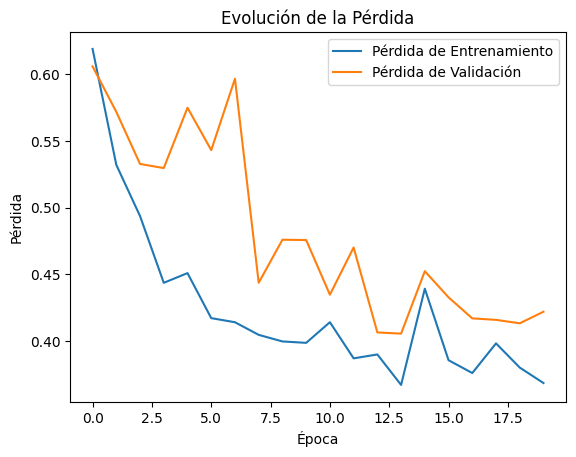

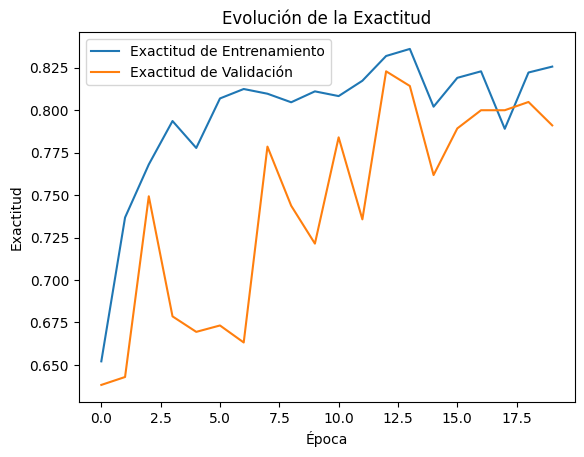

In [21]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [22]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [23]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.8246 - loss: 0.3892
Pérdida: 0.39595547318458557
Exactitud: 0.8165000081062317


## Curva ROC

In [1]:
# Importar las bibliotecas necesarias para calcular y graficar la curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Leer el modelo
model = tf.keras.models.load_model('models/noveno_cnn.h5')

In [12]:
# Calcular el número de pasos necesarios para recorrer todo el conjunto de prueba
steps_test = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Realizar predicciones usando el conjunto de prueba
y_pred_prob = model.predict(test_generator, steps=steps_test, verbose=1)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step


In [13]:
# Obtener las etiquetas verdaderas del generador de prueba
y_true = test_generator.classes

In [14]:
# Asegurarse de que las etiquetas verdaderas (y_true) y las predicciones (y_pred_prob) tengan la misma longitud
#assert len(y_true) == len(y_pred_prob), "Las predicciones y las etiquetas verdaderas tienen diferente número de muestras."

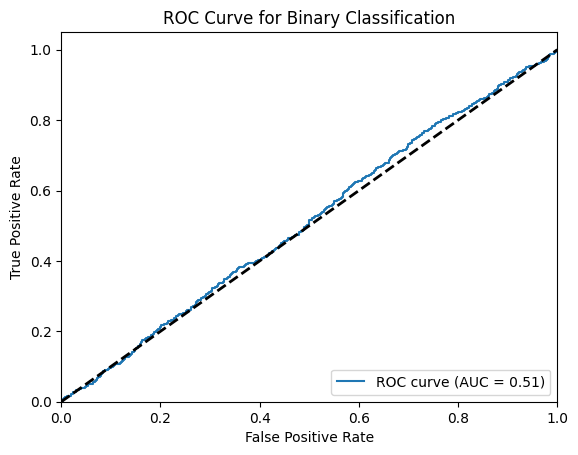

In [15]:
# Extraer las probabilidades para la clase positiva (por ejemplo, Maligno, que está en la segunda columna)
y_pred_prob_positive = y_pred_prob[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob_positive)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.show()